<a href="https://colab.research.google.com/github/Ali478/Implementation-of-naive-base-classifier/blob/main/Qno3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module that allows Python to read data from Excel files.**

In [1]:
import xlrd

# **Connect Google Drive To Pick up the content**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_file_path = "/content/drive/MyDrive/ML_Assig2/golf-dataset.xlsx"

# **`Open Excel file using python api XLRD`**

In [4]:
dataset_workbook = xlrd.open_workbook(dataset_file_path)
dataset_sheet = dataset_workbook.sheet_by_index(0)

# **Using first 11 samples, predict the Yes or No label for the samples 12 and 13. Write your results in the form of a table. Comment on the performance of NB classifier. What would be the class label for the sample given in 1. Does the class label change?**

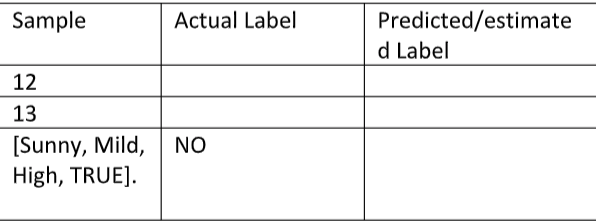




---
**Testing sample**


---



In [5]:
test_sample = ["Overcast", "Hot", "Normal", 0]
total_samples = 11

In [6]:
no_count = 0
yes_count = 0 



---
**Checking probability by Column Operation**

---



In [7]:
row_pointer, col_pointer = 1, 4

while(row_pointer != total_samples + 1):

    if dataset_sheet.cell_value(row_pointer, col_pointer) == "No":
        no_count += 1
    elif dataset_sheet.cell_value(row_pointer, col_pointer) == "Yes":
        yes_count += 1

    row_pointer += 1




---


**Probability Formula**

---



In [8]:
no_probability = no_count / total_samples
yes_probability = yes_count / total_samples

In [9]:
test_sample_probability_no = 0
test_sample_probability_yes = 0



---

**Initializing variables**

---



In [10]:
feature1 = test_sample[0]
feature2 = test_sample[1]
feature3 = test_sample[2]
feature4 = test_sample[3]

feature1_count_with_no = 0
feature2_count_with_no = 0
feature3_count_with_no = 0
feature4_count_with_no = 0

feature1_count_with_yes = 0
feature2_count_with_yes = 0
feature3_count_with_yes = 0
feature4_count_with_yes = 0



---


**Remaining Colmun Operations**

---



In [11]:
row_pointer, col_pointer = 1, 0

while(row_pointer != (total_samples + 1)):

    if dataset_sheet.cell_value(row_pointer, col_pointer) == feature1 and dataset_sheet.cell_value(row_pointer, col_pointer + 4) == "No":
        feature1_count_with_no += 1 
    elif dataset_sheet.cell_value(row_pointer, col_pointer) == feature1 and dataset_sheet.cell_value(row_pointer, col_pointer + 4) == "Yes": 
        feature1_count_with_yes += 1

    row_pointer += 1

In [12]:
row_pointer, col_pointer = 1, 1

while(row_pointer != (total_samples + 1)):
    
    if dataset_sheet.cell_value(row_pointer, col_pointer) == feature2 and dataset_sheet.cell_value(row_pointer, col_pointer + 3) == "No":
        feature2_count_with_no += 1 
    elif dataset_sheet.cell_value(row_pointer, col_pointer) == feature2 and dataset_sheet.cell_value(row_pointer, col_pointer + 3) == "Yes": 
        feature2_count_with_yes += 1

    row_pointer += 1

In [13]:
row_pointer, col_pointer = 1, 2

while(row_pointer != (total_samples + 1)):
    
    if dataset_sheet.cell_value(row_pointer, col_pointer) == feature3 and dataset_sheet.cell_value(row_pointer, col_pointer + 2) == "No":
        feature3_count_with_no += 1 
    elif dataset_sheet.cell_value(row_pointer, col_pointer) == feature3 and dataset_sheet.cell_value(row_pointer, col_pointer + 2) == "Yes": 
        feature3_count_with_yes += 1

    row_pointer += 1

In [14]:
row_pointer, col_pointer = 1, 3

while(row_pointer != (total_samples + 1)):
    
    if dataset_sheet.cell_value(row_pointer, col_pointer) == feature4 and dataset_sheet.cell_value(row_pointer, col_pointer + 1) == "No":
        feature4_count_with_no += 1 
    elif dataset_sheet.cell_value(row_pointer, col_pointer) == feature4 and dataset_sheet.cell_value(row_pointer, col_pointer + 1) == "Yes": 
        feature4_count_with_yes += 1

    row_pointer += 1



---

**Applying Smoothing on the probability of Feature of Outlook**


---


In [15]:
feature1_probability_no = feature1_count_with_no / no_count if feature1_count_with_no > 0 else (feature1_count_with_no + 1) / (no_count + 1)
feature2_probability_no = feature2_count_with_no / no_count if feature2_count_with_no > 0 else (feature2_count_with_no + 1) / (no_count + 1)
feature3_probability_no = feature3_count_with_no / no_count if feature3_count_with_no > 0 else (feature3_count_with_no + 1) / (no_count + 1)
feature4_probability_no = feature4_count_with_no / no_count if feature4_count_with_no > 0 else (feature4_count_with_no + 1) / (no_count + 1)

In [16]:
feature1_probability_yes = feature1_count_with_yes / yes_count if feature1_count_with_yes > 0 else (feature1_count_with_yes + 1) / (yes_count + 1)
feature2_probability_yes = feature2_count_with_yes / yes_count if feature2_count_with_yes > 0 else (feature2_count_with_yes + 1) / (yes_count + 1)
feature3_probability_yes = feature3_count_with_yes / yes_count if feature3_count_with_yes > 0 else (feature3_count_with_yes + 1) / (yes_count + 1)
feature4_probability_yes = feature4_count_with_yes / yes_count if feature4_count_with_yes > 0 else (feature4_count_with_yes + 1) / (yes_count + 1)



---

**FINAL PROBABILITY FORMULA**


---



In [17]:
sample_probability_no = no_probability * feature1_probability_no * feature2_probability_no * feature3_probability_no * feature4_probability_no
sample_probability_yes = yes_probability * feature1_probability_yes * feature2_probability_yes * feature3_probability_yes * feature4_probability_yes



---
**PRINT THE FINAL RESULTS**



---



In [18]:
print(f"P(No  | [Overcast, Hot, Normal, FALSE]) = {sample_probability_no}")
print(f"P(Yes | [Overcast, Hot, Normal, FALSE]) = {sample_probability_yes}")

P(No  | [Overcast, Hot, Normal, FALSE]) = 0.004545454545454546
P(Yes | [Overcast, Hot, Normal, FALSE]) = 0.015902464882056714
